# Analysis of Simulated S2P Files

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import S2P_Tools as s2p

Apparatus Measurements and Fundamental Constants

In [171]:
# Speed of light
c = 299792458

# Sample thickness
d = 0.0127

#### Ferrite Sample Only
The simulated data for only ferrite sample is plotted and the NRW method is applied to calculate $\epsilon$ and $\mu$.


Simulated Data\GarnetOnlySimulated.s2p


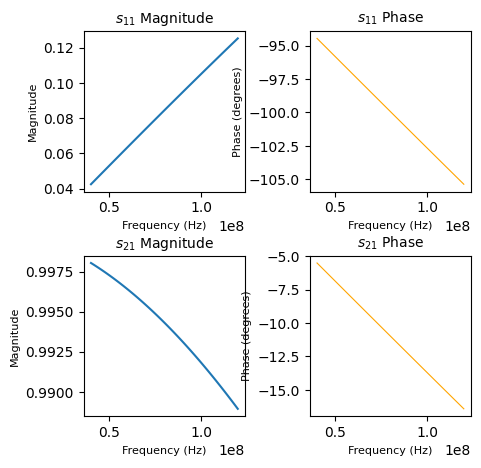

Average Relative permittivity:  (13.024929164990175-0.025979773766599382j)
Average Relative permeability:  (5.007256279768772-0.17072022609416984j)


In [172]:
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'Simulated Data\GarnetOnlySimulated.s2p', True)

# NRW method on simulated data
lambda_0 = c / frequency
s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)

lambda_0 = c / frequency
A = -((1/(2*np.pi*d)) * np.log(1/T))**2

# Zero cut-off wavelength
mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
epsilon_r = (lambda_0**2 / mu_r ) * (A)
print('Average Relative permittivity: ', np.average(epsilon_r))
print('Average Relative permeability: ', np.average(mu_r))

#### Simulated S2P Deembedded
TRVNA is used to deembed the sample from the holder. Deembedding with only the holder does not result in the correct $\epsilon$ and $\mu$.

Simulated Data\Garnet_Deembed_from_withholder.s2p


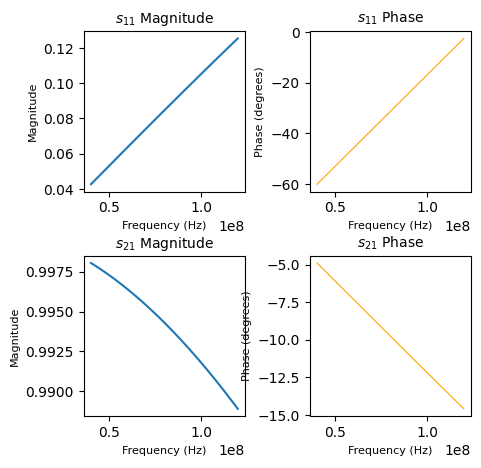

Simulated Data\Garnet_Deembed_from_withholder.s2p with Phase Correction


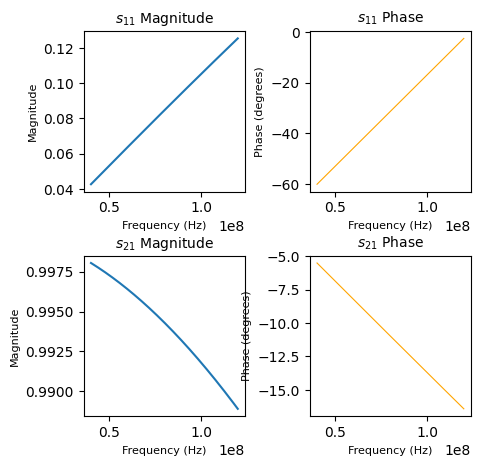

i:  -2
Relative permittivity:  (46.68953739497816+19.317490847357142j)
Relative permeability:  (33.58423933832999-12.793689489190315j)
i:  -1
Relative permittivity:  (18.226346529705484+8.072838167170865j)
Relative permeability:  (12.994302252696219-4.4310431899320974j)
i:  0
Relative permittivity:  (10.236844335567184+3.1718145130154127j)
Relative permeability:  (7.595634832937553-3.9316031093261214j)
i:  1
Relative permittivity:  (38.70003520083986+14.41646719320169j)
Relative permeability:  (28.185571918571323-12.29424940858434j)
i:  2
Relative permittivity:  (67.16322606611253+25.661119873387968j)
Relative permeability:  (48.77550900420509-20.65689570784256j)


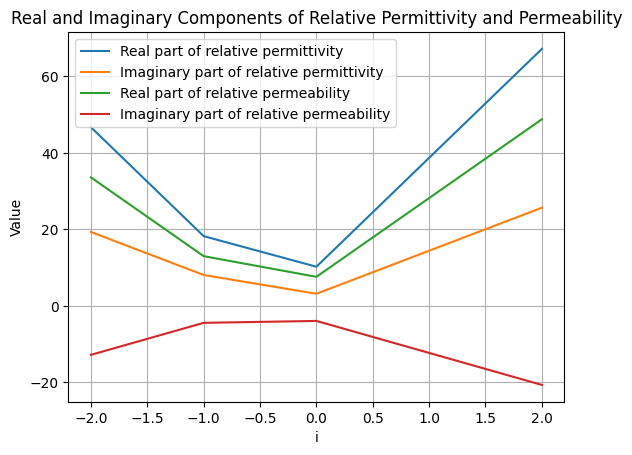

In [173]:
filename = r'Simulated Data\Garnet_Deembed_from_withholder.s2p'
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(filename, True)

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase - phi_0

# Plot the data with the air sample phase correction added
s2p.plot_parameters(filename + " with Phase Correction", frequency, s11_mag, s11_phase, s21_mag, s21_phase)

lambda_0 = c / frequency
s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))
# Calculate
K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)

# Calculate the relative permittivity and permeability
lambda_0 = c / frequency

epsilon_r_values = []  # List to store relative permittivity values
mu_r_values = []  # List to store relative permeability values

i_values = range(-2, 3)

epsilon_r_values = []  # List to store relative permittivity values
mu_r_values = []  # List to store relative permeability values

for i in i_values:
    
    A = -((1/(2*np.pi*d)) * np.log(1/T) + 2j*np.pi*i)**2

    # Non-zero cut off wavelength
    #mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2-1/lambda_c**2)
    #epsilon_r = (lambda_0**2 / mu_r ) * (1/lambda_c**2+ A)

    # Zero cut-off wavelength
    mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
    epsilon_r = (lambda_0**2 / mu_r ) * (A)
    print("i: ", i)
    print('Relative permittivity: ', np.average(epsilon_r))
    print('Relative permeability: ', np.average(mu_r))

    epsilon_r_values.append(np.average(epsilon_r))
    mu_r_values.append(np.average(mu_r))

# Plot the values
plt.plot(i_values, np.real(epsilon_r_values), label='Real part of relative permittivity')
plt.plot(i_values, np.imag(epsilon_r_values), label='Imaginary part of relative permittivity')
plt.plot(i_values, np.real(mu_r_values), label='Real part of relative permeability')
plt.plot(i_values, np.imag(mu_r_values), label='Imaginary part of relative permeability')
plt.xlabel('i')
plt.ylabel('Value')
plt.title('Real and Imaginary Components of Relative Permittivity and Permeability')
plt.legend()
plt.grid(True)
plt.show()

#### Deembed and Matching Phases
Inspecting the phases, we see that the garnet only phases can be produced by simply subtracting the fittings and holder phases then adding on the air correction we have used before. Note the air correction must be added to $s_{11}$ and $s_{21}$. It is not yet clear why.

Simulated Data\ForBen_thru_trl_withsholder_v1.s2p


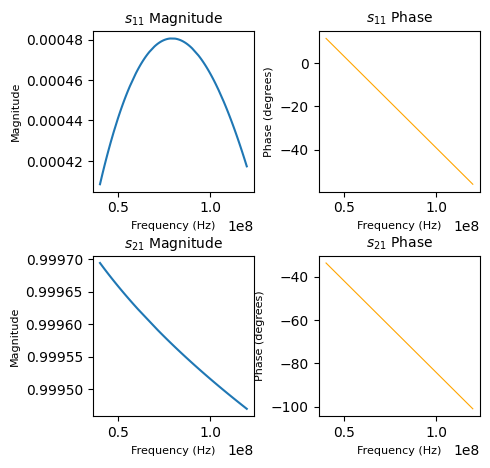

Simulated Data\ForBen_sample_nom_trl_v1.s2p


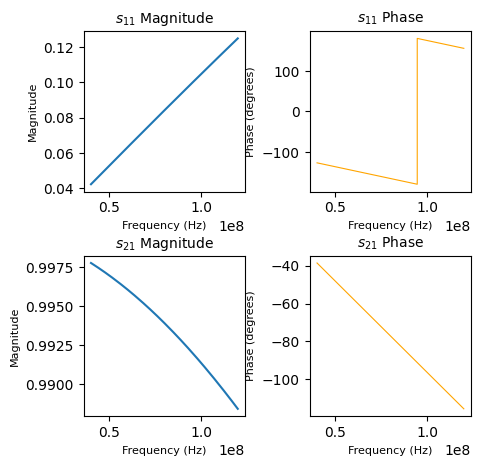

Simulated Data\ForBen_sample_nom_trl_v1.s2p with the Phase Correction


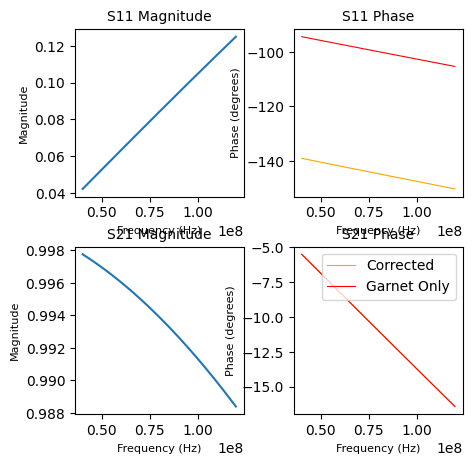

Relative permittivity:  (12.06105628672983-3.0688104815015875j)
Relative permeability:  (6.276266340399404+2.4612759452263884j)


In [174]:
# Save garnet only values to plot
frequency_g, s11_mag, s11_phase_g, s21_mag, s21_phase_g = s2p.parameters(r'Simulated Data\GarnetOnlySimulated.s2p', False)

# Save through values of fitting with holder so we can remove the phases
frequency_h, s11_mag, s11_phase_h, s21_mag, s21_phase_h = s2p.parameters(r'Simulated Data\ForBen_thru_trl_withsholder_v1.s2p', True)

# Holder and sample data
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'Simulated Data\ForBen_sample_nom_trl_v1.s2p', True)

# Subtract 360 from the values that are greater than zero
mask = s11_phase > 0
s11_phase[mask] -= 360

# Subtract the fitting and holder phases
s11_phase = s11_phase - s11_phase_h
s21_phase = s21_phase - s21_phase_h

# Phase correction due to the air sample
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase - phi_0
s11_phase = s11_phase - phi_0

# Plot the data with the air sample phase correction added and sample only to compare
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
print(r'Simulated Data\ForBen_sample_nom_trl_v1.s2p with the Phase Correction')
axs[0, 0].plot(frequency, s11_mag)
axs[0, 0].set_title('S11 Magnitude', size = 10)
axs[0, 0].set_xlabel('Frequency (Hz)', size = 8)
axs[0, 0].set_ylabel('Magnitude', size = 8)

axs[0, 1].plot(frequency, s11_phase, color='orange', linewidth=0.8, label='Corrected')
axs[0, 1].plot(frequency_g, s11_phase_g, color='red', linewidth=0.8, label='Garnet Only')
axs[0, 1].set_title('S11 Phase',size = 10)
axs[0, 1].set_xlabel('Frequency (Hz)', size = 8)
axs[0, 1].set_ylabel('Phase (degrees)', size = 8)

axs[1, 0].plot(frequency, s21_mag)
axs[1, 0].set_title('S21 Magnitude',size = 10)
axs[1, 0].set_xlabel('Frequency (Hz)', size = 8)
axs[1, 0].set_ylabel('Magnitude', size = 8)

axs[1, 1].plot(frequency, s21_phase, color='orange', linewidth=0.8, label='Corrected')
axs[1, 1].plot(frequency_g, s21_phase_g, color='red', linewidth=0.8, label='Garnet Only')
axs[1, 1].set_title('S21 Phase',size = 10)
axs[1, 1].set_xlabel('Frequency (Hz)', size = 8)
axs[1, 1].set_ylabel('Phase (degrees)', size = 8)

plt.legend()    
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# Calculate epsilon and mu
s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)

# Calculate the relative permittivity and permeability
lambda_0 = c / frequency

A = -((1/(2*np.pi*d)) * np.log(1/T))**2

# Zero cut-off wavelength
mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
epsilon_r = (lambda_0**2 / mu_r ) * (A)
print('Relative permittivity: ', np.average(epsilon_r))
print('Relative permeability: ', np.average(mu_r))

We see that we need to add 45 degrees in order to match the corrected phase with the phase of the sample only

In [175]:
s11_phase = s11_phase + 45

Simulated Data\ForBen_sample_nom_trl_v1.s2p with the Phase Correction & 45 degree correction


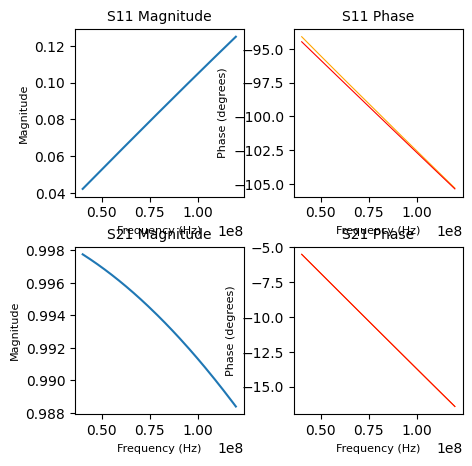

Relative permittivity:  (13.01125461352204-0.034268720525999656j)
Relative permeability:  (5.0222694936890075-0.20577100206164475j)


In [176]:
# Plot the data with the air sample phase correction added and sample only to compare
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
print(r'Simulated Data\ForBen_sample_nom_trl_v1.s2p with the Phase Correction & 45 degree correction')
axs[0, 0].plot(frequency, s11_mag)
axs[0, 0].set_title('S11 Magnitude', size = 10)
axs[0, 0].set_xlabel('Frequency (Hz)', size = 8)
axs[0, 0].set_ylabel('Magnitude', size = 8)

axs[0, 1].plot(frequency, s11_phase, color='orange', linewidth=0.8)
axs[0, 1].plot(frequency_g, s11_phase_g, color='red', linewidth=0.8)
axs[0, 1].set_title('S11 Phase',size = 10)
axs[0, 1].set_xlabel('Frequency (Hz)', size = 8)
axs[0, 1].set_ylabel('Phase (degrees)', size = 8)

axs[1, 0].plot(frequency, s21_mag)
axs[1, 0].set_title('S21 Magnitude',size = 10)
axs[1, 0].set_xlabel('Frequency (Hz)', size = 8)
axs[1, 0].set_ylabel('Magnitude', size = 8)

axs[1, 1].plot(frequency, s21_phase, color='orange', linewidth=0.8)
axs[1, 1].plot(frequency_g, s21_phase_g, color='red', linewidth=0.8)
axs[1, 1].set_title('S21 Phase',size = 10)
axs[1, 1].set_xlabel('Frequency (Hz)', size = 8)
axs[1, 1].set_ylabel('Phase (degrees)', size = 8)
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# Calculate epsilon and mu
s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)

# Calculate the relative permittivity and permeability
lambda_0 = c / frequency

A = -((1/(2*np.pi*d)) * np.log(1/T))**2

# Zero cut-off wavelength
mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
epsilon_r = (lambda_0**2 / mu_r ) * (A)
print('Relative permittivity: ', np.average(epsilon_r))
print('Relative permeability: ', np.average(mu_r))

#### Simulation of Holder (Air Gap) Only
The $45^\circ $ phase shift on $s_{11}$ is aparent when we look at the phases of simulations of half an inch of air only going from 0 to 100MHz.

Simulated Data\onlysampleholder_0_90.S2P


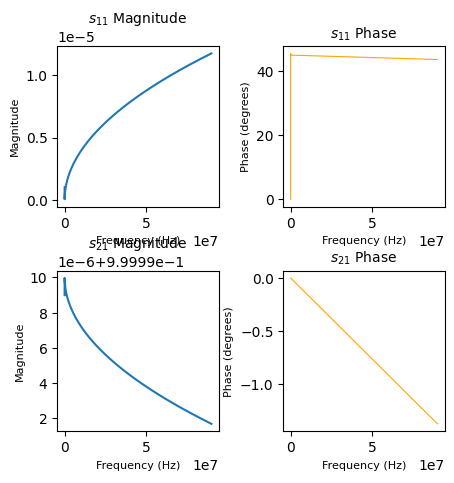

In [182]:
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'Simulated Data\onlysampleholder_0_90.S2P', True)